In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
%pip install wordcloud
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize, RegexpTokenizer
from sklearn.cluster import MiniBatchKMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud, STOPWORDS
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
nltk.download('vader_lexicon')
nltk.download('stopwords')
nltk.download ('punkt')
nltk.download('wordnet')
from nltk.probability import FreqDist
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
import warnings
warnings.filterwarnings('ignore')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
vacc_twt= pd.read_csv('vaccination_tweets-1.csv')
vacc_twt

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446,2129,False
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11015,1460932683630977025,theSun,Petaling Jaya,Breaking news updates from the website of Mala...,2009-07-29 01:58:44,151937,465,593,False,2021-11-17 11:27:49,"The number of Covid-19 cases today, 17 Novembe...",NaN,Twitter Web App,2,6,False
11016,1460809350792896516,Sujan,NaN,________________________ •Napricorn• •It's jus...,2013-01-28 11:48:20,4259,622,156941,False,2021-11-17 03:17:44,First dose ✅\n#PfizerBioNTech,['PfizerBioNTech'],Twitter for Android,0,4,False
11017,1460581918295031809,theSun,Petaling Jaya,Breaking news updates from the website of Mala...,2009-07-29 01:58:44,151937,465,593,False,2021-11-16 12:14:00,"The number of Covid-19 cases today, 16 Novembe...",NaN,Twitter Web App,3,5,False
11018,1460344277951782922,Aleksejs Jackovs,Ireland,#Scientificresearcher in #InformationTechnolog...,2012-08-13 13:47:03,1,38,99,False,2021-11-15 20:29:42,#PfizerBioNTech has developed new pill #Paxlov...,"['PfizerBioNTech', 'Paxlovid', 'COVID19']",Twitter Web App,1,1,False


In [ ]:
vacc_twt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11020 entries, 0 to 11019
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                11020 non-null  int64 
 1   user_name         11020 non-null  object
 2   user_location     8750 non-null   object
 3   user_description  10341 non-null  object
 4   user_created      11020 non-null  object
 5   user_followers    11020 non-null  int64 
 6   user_friends      11020 non-null  int64 
 7   user_favourites   11020 non-null  int64 
 8   user_verified     11020 non-null  bool  
 9   date              11020 non-null  object
 10  text              11020 non-null  object
 11  hashtags          8438 non-null   object
 12  source            11019 non-null  object
 13  retweets          11020 non-null  int64 
 14  favorites         11020 non-null  int64 
 15  is_retweet        11020 non-null  bool  
dtypes: bool(2), int64(6), object(8)
memory usage: 1.2+ MB


##Dropping duplicates row in the dataset if any

In [ ]:
vacc_twt= vacc_twt.drop_duplicates() #Looking at the dataset, it seems there are duplicates but after using the drop_duplicates function it is evident that there is no duplicate row as a result of some features not been the same such as the id, favorites and text e.g tweet by user_name:VaxBLR which appears more than once which is as a reult of the individual having tweeted several times but with different text.
vacc_twt

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446,2129,False
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11015,1460932683630977025,theSun,Petaling Jaya,Breaking news updates from the website of Mala...,2009-07-29 01:58:44,151937,465,593,False,2021-11-17 11:27:49,"The number of Covid-19 cases today, 17 Novembe...",NaN,Twitter Web App,2,6,False
11016,1460809350792896516,Sujan,NaN,________________________ •Napricorn• •It's jus...,2013-01-28 11:48:20,4259,622,156941,False,2021-11-17 03:17:44,First dose ✅\n#PfizerBioNTech,['PfizerBioNTech'],Twitter for Android,0,4,False
11017,1460581918295031809,theSun,Petaling Jaya,Breaking news updates from the website of Mala...,2009-07-29 01:58:44,151937,465,593,False,2021-11-16 12:14:00,"The number of Covid-19 cases today, 16 Novembe...",NaN,Twitter Web App,3,5,False
11018,1460344277951782922,Aleksejs Jackovs,Ireland,#Scientificresearcher in #InformationTechnolog...,2012-08-13 13:47:03,1,38,99,False,2021-11-15 20:29:42,#PfizerBioNTech has developed new pill #Paxlov...,"['PfizerBioNTech', 'Paxlovid', 'COVID19']",Twitter Web App,1,1,False


##Checking for Missing Values

In [ ]:
miss_val= vacc_twt.isna().sum()
miss_val

id                     0
user_name              0
user_location       2270
user_description     679
user_created           0
user_followers         0
user_friends           0
user_favourites        0
user_verified          0
date                   0
text                   0
hashtags            2582
source                 1
retweets               0
favorites              0
is_retweet             0
dtype: int64

##Replacing Missing Values

In [ ]:
from sklearn.impute import SimpleImputer
rep_missval= SimpleImputer(missing_values= np.nan, strategy='most_frequent')
vacc_twt= rep_missval.fit_transform(vacc_twt)
newvacc_twt=pd.DataFrame(vacc_twt).rename({0:'id', 1:'user_name', 2:'user_location',3:'user_description', 4:'user_created', 5:'user_followers', 6:'user_friends', 7:'user_favourites',8:'user_verified',9:'date', 10:'text', 11:'hashtags', 12:'source', 13:'retweets', 14:'favorites',15:'is_retweet'}, axis=1)
newvacc_twt

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,['PfizerBioNTech'],Twitter Web App,1,1,False
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",['PfizerBioNTech'],Twitter Web App,446,2129,False
4,1337854064604966912,Citizen News Channel,Malaysia,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11015,1460932683630977025,theSun,Petaling Jaya,Breaking news updates from the website of Mala...,2009-07-29 01:58:44,151937,465,593,False,2021-11-17 11:27:49,"The number of Covid-19 cases today, 17 Novembe...",['PfizerBioNTech'],Twitter Web App,2,6,False
11016,1460809350792896516,Sujan,Malaysia,________________________ •Napricorn• •It's jus...,2013-01-28 11:48:20,4259,622,156941,False,2021-11-17 03:17:44,First dose ✅\n#PfizerBioNTech,['PfizerBioNTech'],Twitter for Android,0,4,False
11017,1460581918295031809,theSun,Petaling Jaya,Breaking news updates from the website of Mala...,2009-07-29 01:58:44,151937,465,593,False,2021-11-16 12:14:00,"The number of Covid-19 cases today, 16 Novembe...",['PfizerBioNTech'],Twitter Web App,3,5,False
11018,1460344277951782922,Aleksejs Jackovs,Ireland,#Scientificresearcher in #InformationTechnolog...,2012-08-13 13:47:03,1,38,99,False,2021-11-15 20:29:42,#PfizerBioNTech has developed new pill #Paxlov...,"['PfizerBioNTech', 'Paxlovid', 'COVID19']",Twitter Web App,1,1,False


##Rechecking for Missing Values

In [ ]:
newvacc_twt.isna().sum() #No more missing values in the dataset

id                  0
user_name           0
user_location       0
user_description    0
user_created        0
user_followers      0
user_friends        0
user_favourites     0
user_verified       0
date                0
text                0
hashtags            0
source              0
retweets            0
favorites           0
is_retweet          0
dtype: int64

In [ ]:
#Converting date columns to datetime data type
newvacc_twt['date'] = pd.to_datetime(newvacc_twt['date'])
newvacc_twt['user_created'] = pd.to_datetime(newvacc_twt['user_created'])
newvacc_twt['date_upd'] = newvacc_twt['date'].dt.date
newvacc_twt

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet,date_upd
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False,2020-12-20
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,['PfizerBioNTech'],Twitter Web App,1,1,False,2020-12-13
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False,2020-12-12
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",['PfizerBioNTech'],Twitter Web App,446,2129,False,2020-12-12
4,1337854064604966912,Citizen News Channel,Malaysia,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False,2020-12-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11015,1460932683630977025,theSun,Petaling Jaya,Breaking news updates from the website of Mala...,2009-07-29 01:58:44,151937,465,593,False,2021-11-17 11:27:49,"The number of Covid-19 cases today, 17 Novembe...",['PfizerBioNTech'],Twitter Web App,2,6,False,2021-11-17
11016,1460809350792896516,Sujan,Malaysia,________________________ •Napricorn• •It's jus...,2013-01-28 11:48:20,4259,622,156941,False,2021-11-17 03:17:44,First dose ✅\n#PfizerBioNTech,['PfizerBioNTech'],Twitter for Android,0,4,False,2021-11-17
11017,1460581918295031809,theSun,Petaling Jaya,Breaking news updates from the website of Mala...,2009-07-29 01:58:44,151937,465,593,False,2021-11-16 12:14:00,"The number of Covid-19 cases today, 16 Novembe...",['PfizerBioNTech'],Twitter Web App,3,5,False,2021-11-16
11018,1460344277951782922,Aleksejs Jackovs,Ireland,#Scientificresearcher in #InformationTechnolog...,2012-08-13 13:47:03,1,38,99,False,2021-11-15 20:29:42,#PfizerBioNTech has developed new pill #Paxlov...,"['PfizerBioNTech', 'Paxlovid', 'COVID19']",Twitter Web App,1,1,False,2021-11-15


In [ ]:
newvacc_twt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11020 entries, 0 to 11019
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                11020 non-null  object        
 1   user_name         11020 non-null  object        
 2   user_location     11020 non-null  object        
 3   user_description  11020 non-null  object        
 4   user_created      11020 non-null  datetime64[ns]
 5   user_followers    11020 non-null  object        
 6   user_friends      11020 non-null  object        
 7   user_favourites   11020 non-null  object        
 8   user_verified     11020 non-null  object        
 9   date              11020 non-null  datetime64[ns]
 10  text              11020 non-null  object        
 11  hashtags          11020 non-null  object        
 12  source            11020 non-null  object        
 13  retweets          11020 non-null  object        
 14  favorites         1102

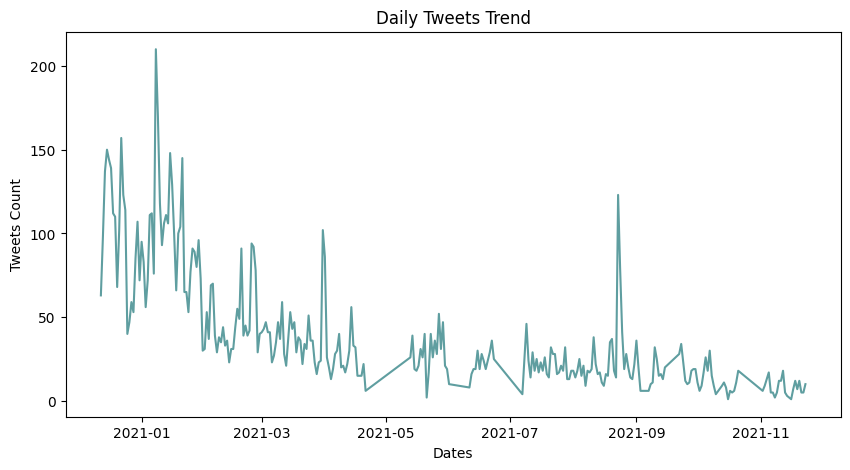

In [ ]:
# Displaying trend of daily tweet

tweets_trend = newvacc_twt.groupby(['date_upd'])['text'].count()

fig = plt.figure(figsize = (10,5))
plt.plot(tweets_trend.index,tweets_trend.values, color='cadetblue')
plt.title('Daily Tweets Trend')
plt.xlabel('Dates')
plt.ylabel('Tweets Count')
plt.show()

In [ ]:
#Checking most talked about vaccine and plotting bar chart for hashtags
hashtag_df= newvacc_twt[['hashtags']].value_counts()
pd.DataFrame(hashtag_df).head(10).plot.bar()
plt.title('Most Popular Covid-19 Vaccine in Tweets')
plt.show()

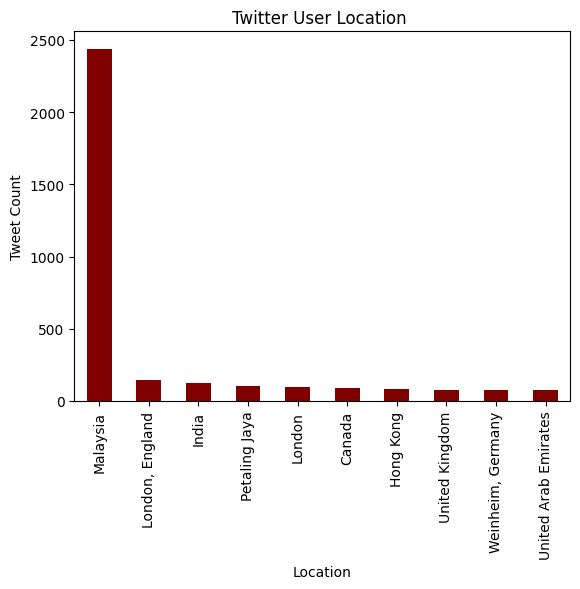

In [ ]:
#Checking Country/Location with most tweet and plotting bar chart for top 10 location
twt_loc= newvacc_twt['user_location'].value_counts()
twt_loc.head(10).plot.bar(color='maroon')
plt.xlabel('Location')
plt.ylabel('Tweet Count')
plt.title('Twitter User Location ')
plt.show()

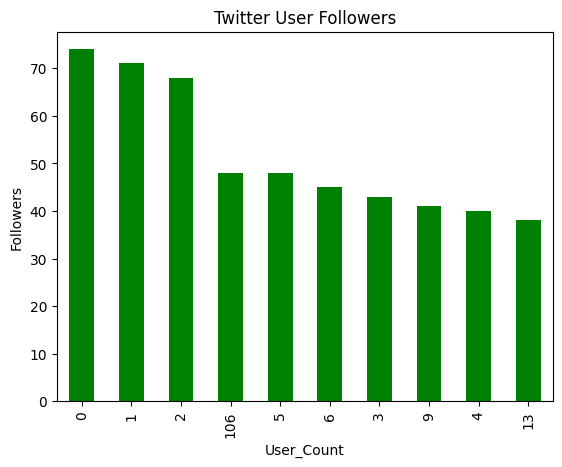

In [ ]:
twtuser_ff= newvacc_twt['user_followers'].value_counts()
twtuser_ff.head(10).plot.bar(color='g')
plt.xlabel('User_Count')
plt.ylabel('Followers')
plt.title('Twitter User Followers')
plt.show()

In [ ]:
#Checking mean of user_friends
twt_userfr= newvacc_twt['user_friends'].mean()
twt_userfr

1170.4702359346643

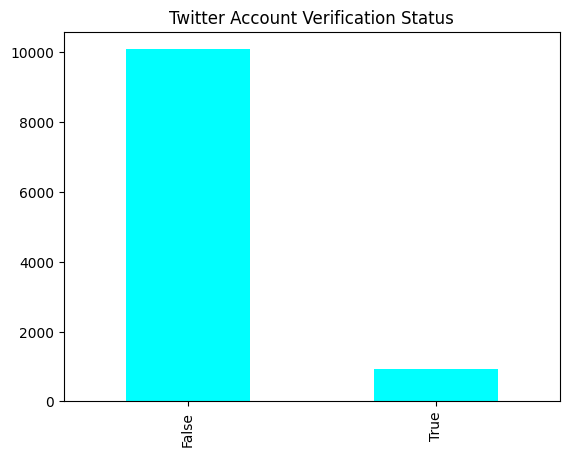

In [ ]:
twtuser_verif= newvacc_twt['user_verified'].value_counts()
twtuser_verif.plot.bar(color='cyan')
plt.title('Twitter Account Verification Status')
plt.show()

In [ ]:
twt_source= newvacc_twt['source'].value_counts()
twt_source.head(10).plot.bar(color='magenta')
plt.title('Tweeting Device')
plt.show()

In [ ]:
twt_isrt= newvacc_twt['is_retweet'].value_counts()
twt_isrt

**Cleaning Text data**

In [ ]:
#Changing all text to lower case alphabets
newvacc_twt['text'] = newvacc_twt['text'].apply(lambda txt: txt.lower())

#Removing special characters from text 
newvacc_twt['text']=newvacc_twt['text'].apply(lambda x:' '.join(re.findall(r'\w+', x)))

#Removing links from text
newvacc_twt['text']=newvacc_twt['text'].apply(lambda x:re.sub(r"http\S+", "", x))

#Removing all single characters in the text
newvacc_twt['text']=newvacc_twt['text'].apply(lambda x:re.sub(r'\s+[a-zA-Z]\s+', '', x))

#Removing Hashtags from the text
newvacc_twt['text']=newvacc_twt['text'].apply(lambda x:re.sub(r'\B#\S+','',x))

#Changing multiple spaces in text with single space
newvacc_twt['text']=newvacc_twt['text'].apply(lambda x:re.sub(r'\s+', ' ', x, flags=re.I))

#Removing Stop words from text.
stop_words= stopwords.words('english')
newvacc_twt['text'] = newvacc_twt['text'].apply(lambda txt: ' '.join([word for word in txt.split() if word not in stop_words]))

#Tokenization of Sentence
newvacc_twt['text'] = newvacc_twt['text'].apply(lambda txt: sent_tokenize(txt))

#Joining Tokenized data into text
newvacc_twt['text'] = newvacc_twt['text'].apply(lambda txt: ' '.join(txt))


**Adding Necessary Columns to the dataset**

In [ ]:
#Creating/Adding new column to store polarity scores as a dictionary in the new column
sid= SIA()
newvacc_twt['Score'] = newvacc_twt['text'].apply(lambda txt: sid.polarity_scores(txt))
newvacc_twt

In [ ]:
#Creating/Adding new columns to the dataframe and each column takes on each class of sentiment i.e Negative, Neutral, Positive and Compound which aggregates the score.

newvacc_twt['Negative'] = newvacc_twt['Score'].apply(lambda txt: txt['neg'])
newvacc_twt['Neutral'] = newvacc_twt['Score'].apply(lambda txt: txt['neu'])
newvacc_twt['Positive'] = newvacc_twt['Score'].apply(lambda txt: txt['pos'])
newvacc_twt['Compound'] = newvacc_twt['Score'].apply(lambda txt: txt['compound'])
newvacc_twt

In [ ]:
#Creating a function to calculate the accuracy test for each text in our dataframe

def polarity_score(compound):
    if compound > 0.05:
        return "Positive"
    elif compound < -0.5:
        return "Negative"
    elif compound >= -0.05 and compound < 0.05:
        return "Neutral"

In [ ]:
polarity_score

**Classifying text into Negative, Neutral, Positive**

In [ ]:
newvacc_twt["Sentiment"] = newvacc_twt['Compound'].apply(lambda val: polarity_score(val))

#Displaying 10 samples from the new dataset
newvacc_twt.sample(10)

In [ ]:
#Selecting text column and newly created columns to have clarity of what's happening
sentiment_df= newvacc_twt[['text','Score','Negative','Neutral','Positive', 'Sentiment']]
sentiment_df

In [ ]:
#Performing Aggregation of each sentiment class
sent_class= newvacc_twt['Sentiment'].value_counts()
sent_class

**Data Visualization**

In [ ]:
#Displaying Sentiment Class Frequency with a pie chart
plt.figure(figsize=(4, 4))
sent_class.plot.pie(explode=(0.2, 0.1, 0.1), autopct='%1.1f%%');

##Looking at elements in Sentiment column, it is obvious some of the text are classified as None instead of Negative, Neutral or Positive and considering the count summary, the total number of calculated items is not up to total number of rows we have in the dataset, in order to improve this, further analysis will be done. See below;

In [ ]:
#Using this function to get polarity of text instead of dictionary like
def format_output(output_dict):
  
  polarity_score = "Neutral"

  if(output_dict['compound']>= 0.05):
    polarity_score = "Positive"

  elif(output_dict['compound']<= -0.05):
    polarity_score = "Negative"

  return polarity_score

def predict_sentiment(txt):
  
  output_dict =  sid.polarity_scores(txt)
  return format_output(output_dict)

# Run the predictions
newvacc_twt["vader_prediction"] = newvacc_twt['text'].apply(predict_sentiment)

#Printing 10 sample result
newvacc_twt.sample(10)

In [ ]:
newsentiment_df= newvacc_twt[['text','Score','Negative','Neutral','Positive', 'Sentiment', 'vader_prediction']]
newsentiment_df

In [ ]:
#Performing Aggregation of each sentiment class
newsent_class= newvacc_twt['vader_prediction'].value_counts()
newsent_class

**Data Visualization**

In [ ]:
# fig=px.histogram(data_frame=newvacc_twt,x='vader_prediction',color='vader_prediction',template='plotly')
# fig.show()

In [ ]:
#Displaying Sentiment Class Frequency with a pie chart
plt.figure(figsize=(4, 4))
newsent_class.plot.pie(explode=(0.2, 0.1, 0.1), autopct='%1.1f%%');

In [ ]:
# Create stopword list:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

#Converting text dataframe to list
text_cloud = " ".join(newvacc_twt['text'].tolist())

#Generate wordcloud data for top 50 words
wordcloud = WordCloud(stopwords=stopwords, max_words=100, \
                      background_color="white").generate(text_cloud)

plt.imshow(wordcloud)
plt.axis("off")
plt.title('General Statement WordCloud')
plt.show()

In [ ]:
positive_text= newvacc_twt[newvacc_twt['vader_prediction']== 'Positive']

#Converting text dataframe to list
positive_sent = " ".join(positive_text['text'].tolist())

#Generate wordcloud data for top 50 words
positive_wordcloud = WordCloud(stopwords=stopwords, max_words=50, \
                      background_color="azure").generate(positive_sent)

plt.imshow(positive_wordcloud)
plt.axis("off")
plt.title('Positive Statement WordCloud')
plt.show()

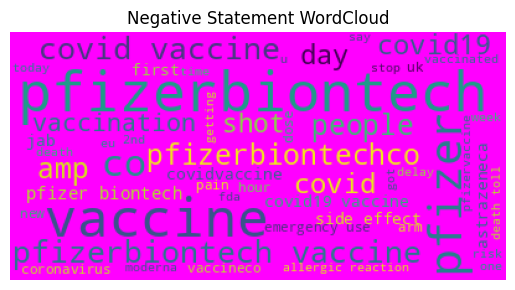

In [ ]:
negative_text= newvacc_twt[newvacc_twt['vader_prediction']== 'Negative']

negative_sent= " ".join(negative_text['text'].tolist())

negative_wordcloud= WordCloud(stopwords=stopwords, max_words=50, \
                              background_color= 'magenta').generate(negative_sent)
                      
plt.imshow(negative_wordcloud)
plt.axis("off")
plt.title('Negative Statement WordCloud')
plt.show()

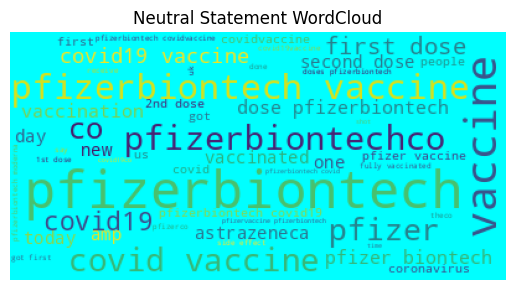

In [ ]:
neutral_text= newvacc_twt[newvacc_twt['vader_prediction']=='Neutral']

neutral_sent= " ".join(neutral_text['text'].tolist())

neutral_wordcloud= WordCloud(stopwords= stopwords, max_words=50, \
                             background_color='cyan').generate(neutral_sent)

plt.imshow(neutral_wordcloud)
plt.axis("off")
plt.title('Neutral Statement WordCloud')
plt.show()


# Preparing Data for Machine Learning Model

In [59]:
mldata= newvacc_twt[['text', 'vader_prediction']]
mldata.to_csv

<bound method NDFrame.to_csv of                                                     text vader_prediction
0      folks said daikon paste could treatcytokine st...          Neutral
1      world wrong side history year hopefully bigges...         Negative
2      coronavirus sputnikv astrazeneca pfizerbiontec...         Positive
3      facts immutable senator even ethically sturdy ...          Neutral
4      explain needvaccine borisjohnson matthancock w...          Neutral
...                                                  ...              ...
11015  number covid 19 cases today 17 november 2021 r...         Positive
11016                          first dose pfizerbiontech          Neutral
11017  number covid 19 cases today 16 november 2021 r...         Positive
11018  pfizerbiontech developed new pill paxlovid inc...         Positive
11019  number covid 19 cases today 15 november 2021 r...         Positive

[11020 rows x 2 columns]>

In [60]:
%pip install keras
%pip install tensorflow
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

#Setup stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

#setup wordnet for lemmatization
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()


from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


label_encoder = LabelEncoder()

#Convert the target variable to categorical
mldata['vader_prediction'] = label_encoder.fit_transform(mldata['vader_prediction'])
mldata['vader_prediction'] = to_categorical(mldata['vader_prediction'])

# Split the data into training and testing sets
X = mldata['text']
Y = mldata['vader_prediction']


#Custom tokenizer that will perform tokenization, stopword removal
#and lemmatization
def customtokenize(str):
    tokens=nltk.word_tokenize(str)
    nostop = list(filter(lambda token: token not in stopwords.words('english'), tokens))
    lemmatized=[lemmatizer.lemmatize(word) for word in nostop ]
    return lemmatized

#Generate TFIDF matrix
vectorizer = TfidfVectorizer(tokenizer=customtokenize)
X_vectorized=vectorizer.fit_transform(X)
X_vect_array= X_vectorized.toarray()

print("\nSample feature names identified : ", vectorizer.get_feature_names_out()[:25])
print("\nSize of TFIDF matrix : ",X_vect_array.shape)

X_train, X_test, Y_train, Y_test = train_test_split(X_vect_array, Y, test_size=0.2, random_state=42)



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!



Sample feature names identified :  ['0' '00' '000' '000001' '000co' '002txllqup' '004' '00am' '00co' '00pm'
 '01' '011' '016' '01aug2021' '01cuib7wh4' '01ddljmgtt' '01ov78md79'
 '01unri2wbwco' '02' '021' '02bgp0bvz4' '02mu5hkys5' '02nx08ygrv'
 '02u6i9tqvt' '02waco']

Size of TFIDF matrix :  (11020, 31096)


# Creating ANN Model

In [53]:
model = Sequential()

# Adding input layer
model.add(Dense(units=64, activation='relu', input_dim=X_vect_array.shape[1], name='layer_1'))

# Adding hidden layers
model.add(Dense(units=128, activation='relu', name='layer_2'))
model.add(Dense(units=64, activation='relu', name='layer_3'))

# Adding output layer
model.add(Dense(units=1, activation='softmax', name='output_layer'))

# Compiling the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['sparse_categorical_accuracy'])

# #Saving Model to disk
model.save('ANN_SentimentM')

# Fitting the model
model.fit(X_train, Y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
221/221 [==============================] - 10s 42ms/step - loss: 0.0000e+00 - sparse_categorical_accuracy: 0.8607 - val_loss: 0.0000e+00 - val_sparse_categorical_accuracy: 0.8515
Epoch 2/10
221/221 [==============================] - 8s 37ms/step - loss: 0.0000e+00 - sparse_categorical_accuracy: 0.8607 - val_loss: 0.0000e+00 - val_sparse_categorical_accuracy: 0.8515
Epoch 3/10
221/221 [==============================] - 7s 32ms/step - loss: 0.0000e+00 - sparse_categorical_accuracy: 0.8607 - val_loss: 0.0000e+00 - val_sparse_categorical_accuracy: 0.8515
Epoch 4/10
221/221 [==============================] - 8s 37ms/step - loss: 0.0000e+00 - sparse_categorical_accuracy: 0.8607 - val_loss: 0.0000e+00 - val_sparse_categorical_accuracy: 0.8515
Epoch 5/10
221/221 [==============================] - 8s 38ms/step - loss: 0.0000e+00 - sparse_categorical_accuracy: 0.8607 - val_loss: 0.0000e+00 - val_sparse_categorical_accuracy: 0.8515
Epoch 6/10
221/221 [==============================] - 

##Model Prediction with Test Data

In [54]:
print("Testing with Test Data :\n------------------------")
#Predict on test data
ann_pred=model.predict(X_test)

Testing with Test Data :
------------------------
69/69 [==============================] - 1s 7ms/step


##Making Prediction with Entire Data using ANN-Model

In [55]:
model.predict(X_vect_array)

345/345 [==============================] - 4s 11ms/step


array([[0.99999994],
       [0.99999994],
       [0.99999994],
       ...,
       [1.        ],
       [1.        ],
       [1.        ]], dtype=float32)

# Model Evaluation

In [58]:
# Model Evaluation
Loss, Accuracy_rate = model.evaluate(X_test, Y_test, verbose=0)
print('Loss:', (Loss))
print('Accuracy:', (Accuracy_rate))

Loss: 0.0
Accuracy: 0.8688747882843018


# Visualizing Model

In [ ]:
# Load the TensorBoard notebook extension
%load_ext tensorboard

import tensorflow as tf
import datetime

# Clear any logs from previous runs
!rm -rf ./logs/

log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=5, write_graph=True)

model.fit(X_train, Y_train, epochs=50, validation_data=(X_test, Y_test), callbacks=[tensorboard_callback])

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard
Epoch 1/50
276/276 [==============================] - 11s 39ms/step - loss: 0.0000e+00 - sparse_categorical_accuracy: 0.8589 - val_loss: 0.0000e+00 - val_sparse_categorical_accuracy: 0.8689
Epoch 2/50
 25/276 [=>............................] - ETA: 7s - loss: 0.0000e+00 - sparse_categorical_accuracy: 0.8525

In [ ]:
%tensorboard --logdir logs/fit

<IPython.core.display.Javascript object>

##Exploring other Machine Learning Algorithm/Models

In [ ]:
#Split as training and testing sets for other Machine Learning Algorithm/Models
X_train_other, X_test_other, Y_train_other, Y_test_other = train_test_split(X_vectorized, Y, test_size=0.2, random_state=42)

##Multinomial Naive Bayes Model

In [ ]:
from sklearn.naive_bayes import MultinomialNB
#Build/Training the model
classifier= MultinomialNB().fit(X_train_other, Y_train_other)
classifier

MultinomialNB()

**Predictions and Evaluation for MultinomialNB Model**

Testing with Test Data :
------------------------


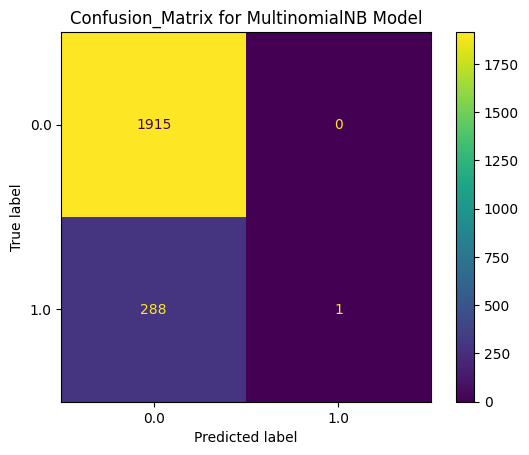


 Prediction Accuracy :  87%

Testing with Entire Text :
--------------------------


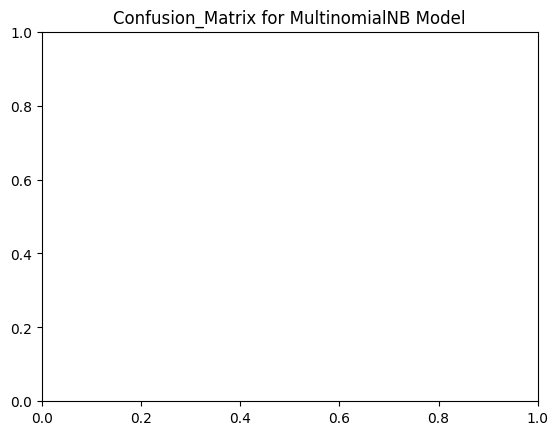


 Prediction Accuracy :  86%


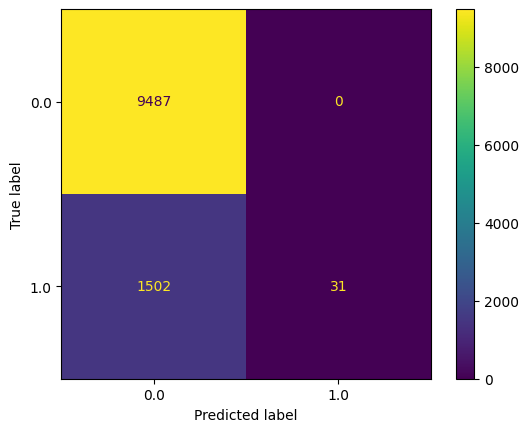

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay

#Predict on test data
print("Testing with Test Data :\n------------------------")
predictions=classifier.predict(X_test_other)
c_matrix= confusion_matrix(Y_test_other, predictions, labels=classifier.classes_)
disp= ConfusionMatrixDisplay(confusion_matrix=c_matrix, display_labels=classifier.classes_)
disp.plot()
plt.title('Confusion_Matrix for MultinomialNB Model')
plt.show()

print("\n Prediction Accuracy : ","{:.0%}".format(accuracy_score(Y_test_other, predictions)))

print("\nTesting with Entire Text :\n--------------------------")

#Predict on entire corpus data
nb_predictions=classifier.predict(X_vectorized)

c_matrix= confusion_matrix(Y, nb_predictions, labels=classifier.classes_)
disp= ConfusionMatrixDisplay(confusion_matrix=c_matrix, display_labels=classifier.classes_)
plt.title('Confusion_Matrix for MultinomialNB Model')
plt.show()
disp.plot()

print("\n Prediction Accuracy : ","{:.0%}".format(accuracy_score(Y, nb_predictions)))

##Decision Tree Model

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dtree= DecisionTreeClassifier(criterion= 'entropy', random_state=0)

dtreemodel= dtree.fit(X_train, Y_train) #DecisionTreeClassifier works with vectorized array, therefore, the vectorized array data will be used here.
dtreemodel

DecisionTreeClassifier(criterion='entropy', random_state=0)

**Predictions for Decision Tree Model**

Testing with Test Data :
------------------------

 Prediction Accuracy :  90%


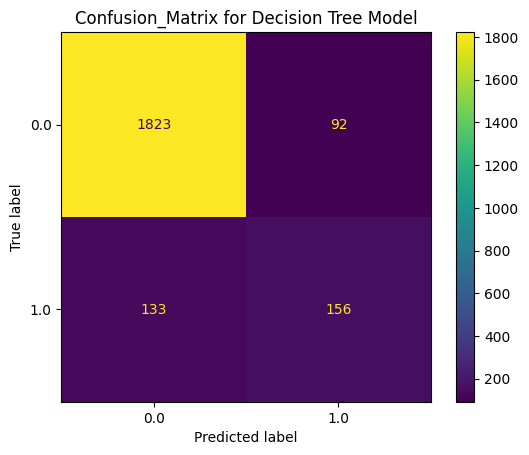


Testing with Full Text Data :
--------------------------


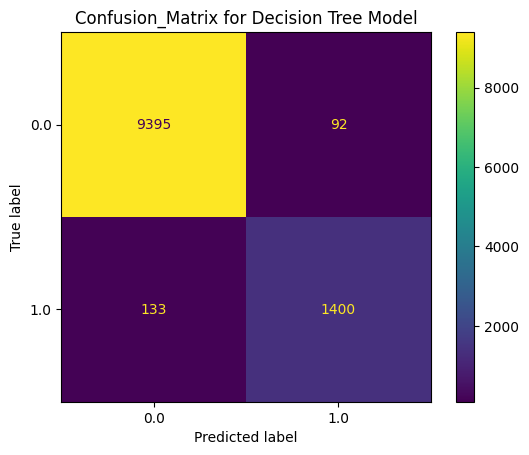


 Prediction Accuracy :  98%


In [ ]:
from sklearn import metrics

print("Testing with Test Data :\n------------------------")
#Predict on test data
dtree_pred=dtreemodel.predict(X_test)
print("\n Prediction Accuracy : ","{:.0%}".format(accuracy_score(Y_test, dtree_pred)))

c_matrix= confusion_matrix(Y_test, dtree_pred, labels=dtreemodel.classes_)
disp= ConfusionMatrixDisplay(confusion_matrix=c_matrix, display_labels=dtreemodel.classes_)
disp.plot()
plt.title('Confusion_Matrix for Decision Tree Model')
plt.show()

print("\nTesting with Full Text Data :\n--------------------------")
#Predict on entire corpus data
dtree_fullpred=dtreemodel.predict(X_vect_array)


c_matrix= confusion_matrix(Y, dtree_fullpred, labels=dtreemodel.classes_)
disp= ConfusionMatrixDisplay(confusion_matrix=c_matrix, display_labels=dtreemodel.classes_)
disp.plot()
plt.title('Confusion_Matrix for Decision Tree Model')
plt.show()
print("\n Prediction Accuracy : ","{:.0%}".format(metrics.accuracy_score(Y, dtree_fullpred)))

##Logistic Regression Model

In [ ]:
from sklearn.linear_model import LogisticRegression
regress= LogisticRegression(random_state=42)
regress= regress.fit(X_train_other, Y_train_other)
regress

LogisticRegression(random_state=42)

**Predictions and Evaluation for Logistic Regression Model**

Testing with Test Data :
------------------------

 Prediction Accuracy :  88%


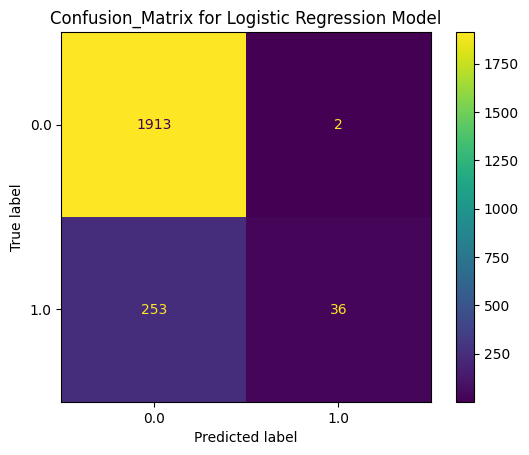


Testing with Full Corpus :
--------------------------


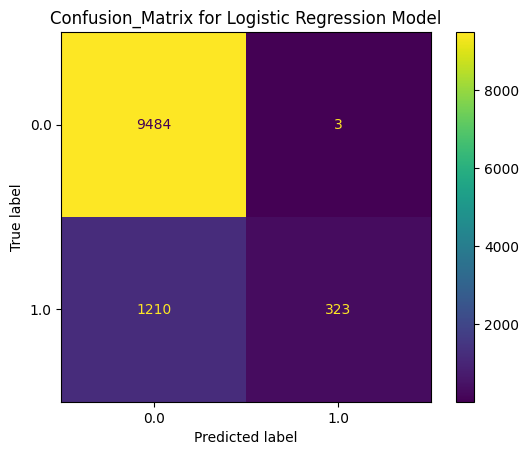


 Prediction Accuracy :  89%


In [ ]:
print("Testing with Test Data :\n------------------------")
#Predict on test data
logr_pred=regress.predict(X_test_other)


print("\n Prediction Accuracy : ","{:.0%}".format(metrics.accuracy_score(Y_test_other, logr_pred)))

c_matrix= confusion_matrix(Y_test_other, logr_pred, labels=regress.classes_)
disp= ConfusionMatrixDisplay(confusion_matrix=c_matrix, display_labels=regress.classes_)
disp.plot()
plt.title('Confusion_Matrix for Logistic Regression Model')
plt.show()

print("\nTesting with Full Corpus :\n--------------------------")
#Predict on entire corpus data
logr_fullpred=regress.predict(X_vectorized)

c_matrix= confusion_matrix(Y, logr_fullpred, labels=regress.classes_)
disp= ConfusionMatrixDisplay(confusion_matrix=c_matrix, display_labels=regress.classes_)
disp.plot()
plt.title('Confusion_Matrix for Logistic Regression Model')
plt.show()

print("\n Prediction Accuracy : ","{:.0%}".format(metrics.accuracy_score(Y, logr_fullpred)))

##Random Forest MODEL

In [ ]:
from sklearn.ensemble import RandomForestClassifier
randfclass= RandomForestClassifier(n_estimators=100, criterion= 'entropy')
randfclass= randfclass.fit(X_train_other, Y_train_other)

Testing with Test Data :
------------------------

 Prediction Accuracy :  91%


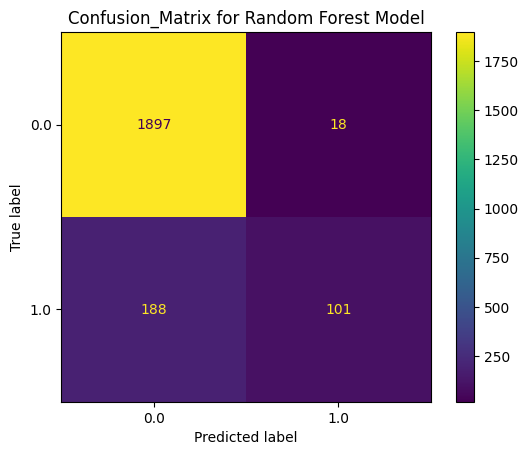


Testing with Full Text Data :
--------------------------


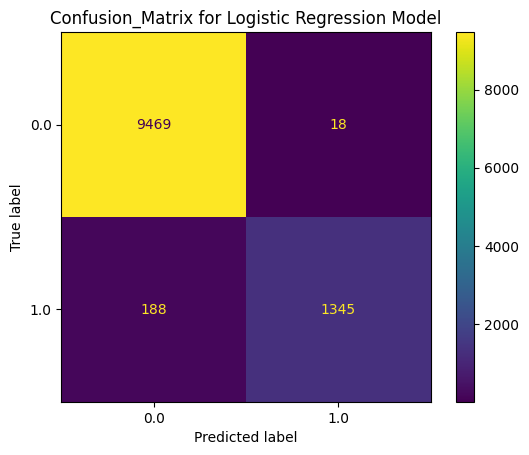


 Prediction Accuracy :  89%


In [ ]:
print("Testing with Test Data :\n------------------------")
#Predict on test data
randf_pred=randfclass.predict(X_test_other)


print("\n Prediction Accuracy : ","{:.0%}".format(accuracy_score(Y_test_other, randf_pred)))

c_matrix= confusion_matrix(Y_test_other, randf_pred, labels=randfclass.classes_)
disp= ConfusionMatrixDisplay(confusion_matrix=c_matrix, display_labels=randfclass.classes_)
disp.plot()
plt.title('Confusion_Matrix for Random Forest Model')
plt.show()

print("\nTesting with Full Text Data :\n--------------------------")
#Predict on entire text data
randf_fullpred=randfclass.predict(X_vectorized)

c_matrix= confusion_matrix(Y, randf_fullpred, labels=randfclass.classes_)
disp= ConfusionMatrixDisplay(confusion_matrix=c_matrix, display_labels=regress.classes_)
disp.plot()
plt.title('Confusion_Matrix for Logistic Regression Model')
plt.show()

print("\n Prediction Accuracy : ","{:.0%}".format(metrics.accuracy_score(Y, logr_fullpred)))

##Retrieving Data using Twitter API

In [ ]:
import tweepy #to access the twitter api
import pandas as pd #for basic data operations

# Importing the keys from twitter api
ConsumerKey = "xxxxxxxxxxxxxxxxxxxx"
ConsumerSecret = "xxxxxxxxxxxxxxxxxxxx"
AccessToken = "xxxxxxxxxxxxxxxxxxxx"
AccessTokenSecret = "xxxxxxxxxxxxxxxxxxxx"

# Establish the connection with twitter API
Auth = tweepy.OAuthHandler(ConsumerKey, ConsumerSecret)
Auth.set_access_token(AccessToken, AccessTokenSecret)
API = tweepy.API(Auth)

# Search for the Term and define number of tweets 
SearchTerm = input("Enter Keyword/Tag to search about: ")
No_Of_Terms = int(input("Enter how many tweets to search: "))

# Get no of tweets and searched term together 
tweets = tweepy.Cursor(API.search, q=SearchTerm).items(No_Of_Terms)